# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'
#symbol = 'NLY'

capital = 10000
start = datetime.datetime(2015, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Run Strategy

In [4]:
s = strategy.Strategy(symbol, capital, start, end, stop_loss_pct=85, margin=1.833,
                      period=7, sma=70, use_regime_filter=True)
s.run()

Retrieve log DataFrames

In [5]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [6]:
tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
288,2020-06-11,296.83,2020-06-23,309.49,12.65,41942.22,3315,568841.15,LONG,SPY
289,2020-06-24,301.59,2020-07-02,309.67,8.07,28401.24,3518,597242.38,LONG,SPY
290,2020-09-03,342.55,2020-09-28,332.77,-9.78,-31779.28,3249,565463.10,LONG,SPY
291,2020-10-19,340.56,2020-11-04,342.08,1.52,4718.27,3097,570181.38,LONG,SPY
292,2020-12-11,364.75,2020-12-16,368.60,3.85,11233.26,2915,581414.64,LONG,SPY


In [7]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-12-16,591414.64,591414.64,591414.64,0,591414.64,1.00,X
2020-12-17,591414.64,591414.64,591414.64,0,591414.64,1.00,-
2020-12-18,591414.64,591414.64,591414.64,0,591414.64,1.00,-
2020-12-21,591414.64,591414.64,591414.64,0,591414.64,1.00,-
2020-12-22,591414.64,591414.64,591414.64,0,591414.64,1.00,-


Generate strategy stats - display all available stats

In [8]:
pf.print_full(stats)

start                                                   1993-11-11
end                                                     2020-12-22
beginning_balance                                            10000
ending_balance                                           591414.64
total_net_profit                                         581414.64
gross_profit                                            1125235.94
gross_loss                                              -543821.30
profit_factor                                                 2.07
return_on_initial_capital                                  5814.15
annual_return_rate                                           16.24
trading_period                           27 years 1 months 11 days
pct_time_in_market                                           31.93
margin                                                        1.83
avg_leverage                                                  1.27
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [9]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()
len(benchmark.dbal)

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-12-22 00:00:00 SELL 215 SPY @ 367.85


6828

Plot Equity Curves: Strategy vs Benchmark

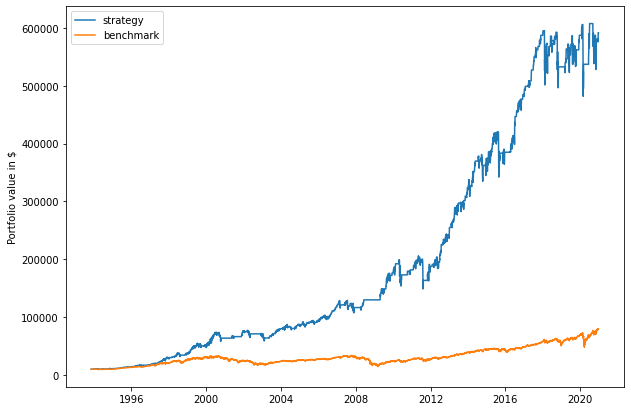

In [10]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

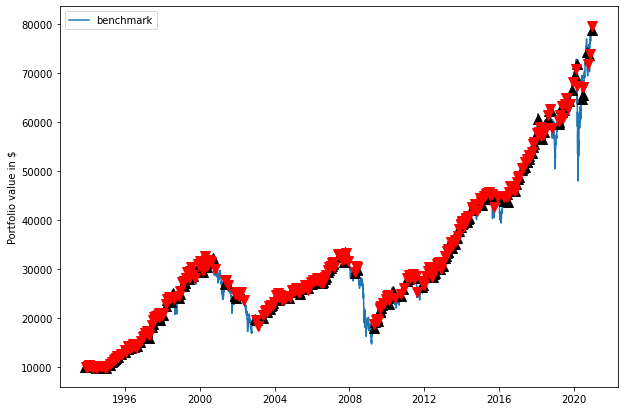

In [11]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,16.24,7.93
max_closed_out_drawdown,-27.75,-56.42
drawdown_annualized_return,-1.71,-7.12
drawdown_recovery,-0.25,-1.42
best_month,25.31,23.06
worst_month,-24.95,-31.38
sharpe_ratio,0.87,0.50
sortino_ratio,0.68,0.63
monthly_std,4.13,4.54
annual_std,17.36,16.46


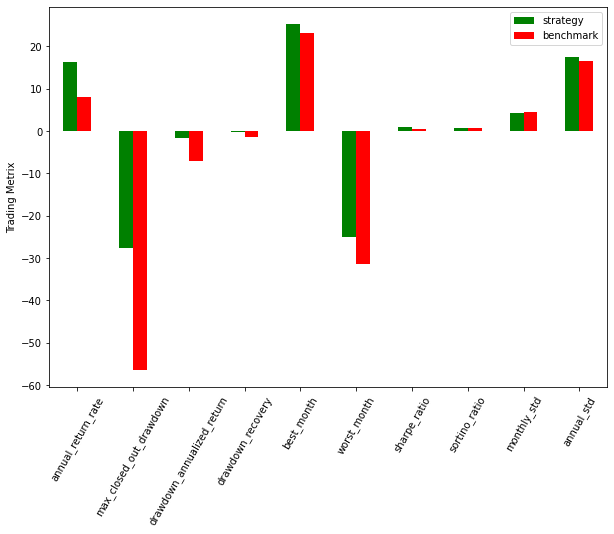

In [12]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df

Plot Instrument Risk vs Strategy Risk

,SPY,Strategy
avg,0.16,0.14
median,0.13,0.12
min,0.03,0.00
max,0.96,0.70
std,0.11,0.13
last,0.10,0.09


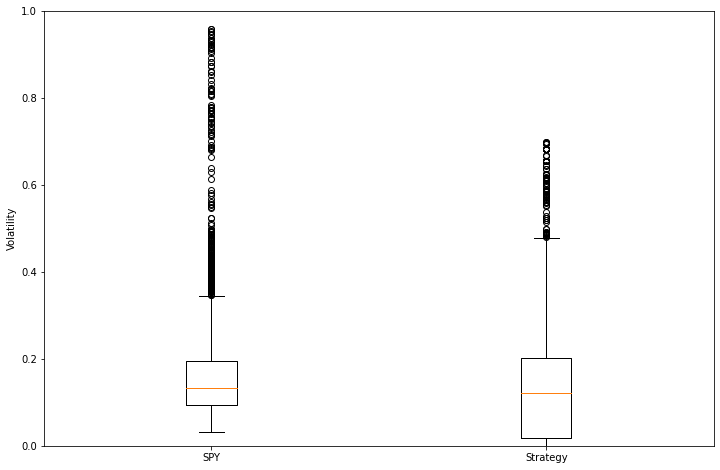

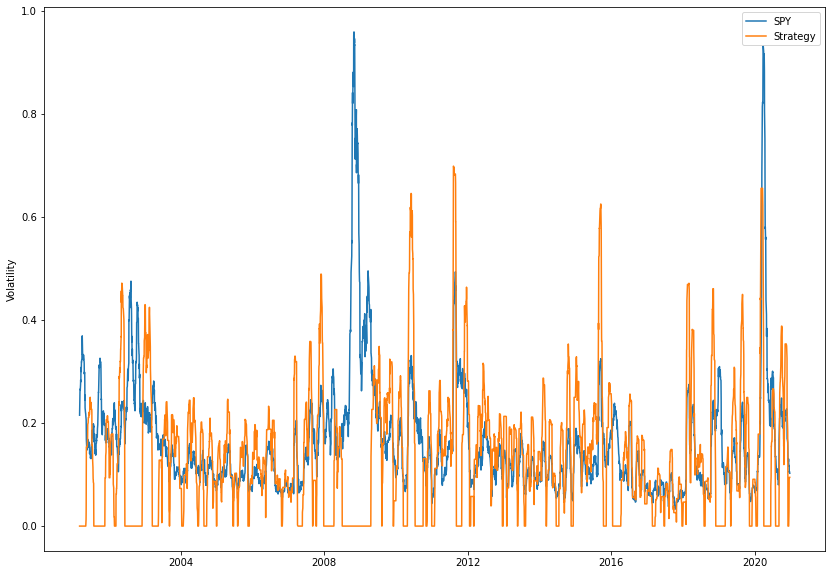

In [13]:
df = pf.volatility_graph([s.ts, dbal], [symbol, 'Strategy'], points_to_plot=5000)
df

Prettier Graphs

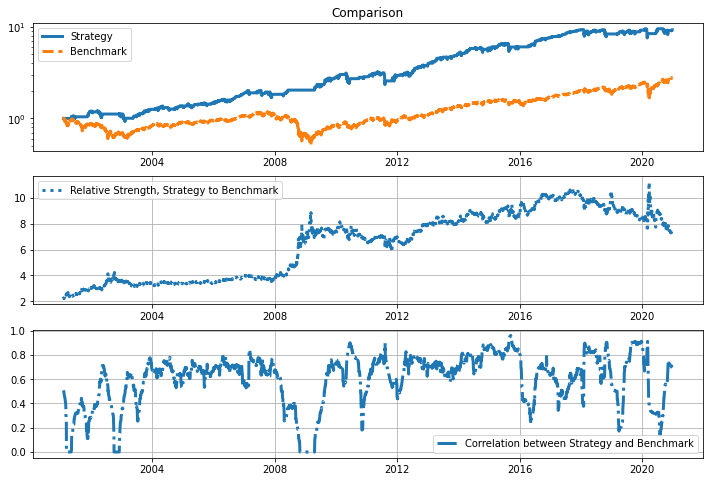

In [14]:
returns = dbal['close']
benchmark_returns = benchmark.dbal['close']
pf.prettier_graphs(returns, benchmark_returns, label1='Strategy', label2='Benchmark', points_to_plot=5000)